# Intensity transformations

In Intensity tarnsformations, output value of the pixel only depends on the input value of that pixel, not it's neighbourhood

## Let's import our usual libraries

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 

First we are creating the transformation vector. This vector is a ONE DIMENSIONAL numpy array. We represent our intensity transformations using thsese vectors. We take the indexes of the array as the X axis and each value of the iindexes as the Y axis values.

transform=(2,56,7,343,7,6,32)

As you can see transform[1]=56

What it means is, we are transforming the pixels with intensity 0 to 56. 

First let's do the most baic tranformation.

## The identity transformation.
This transformation outputs the input as it is

Let's create the vector

In [2]:
trfm=np.arange(0,256).astype("uint8")
print(trfm)
print(trfm.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Let's plot the transformation function first

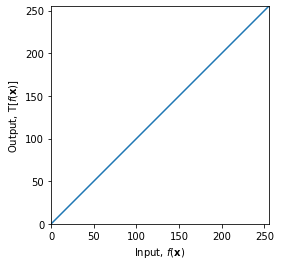

In [3]:
fig, ax = plt.subplots()
ax.plot(trfm)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

For the tranformation we are using a grayscale image to reduce the complexity for now.

In [4]:
img_orig = cv.imread('./images/naruto.jpg', cv.IMREAD_GRAYSCALE) #reading the image to an array as an grayscale image
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)                       #creating a window to dsplay the image
cv.imshow('Image', img_orig)                                      #displaying the image in the created window. You can get an empty window by commenting this line.
cv.waitKey(0)                                                     #idling the flow infinetly until a key is pressed
cv.destroyAllWindows()                                            #closing the window

## Special note about imshow

In default imshow() "display an image in a window. The window automatically fits to the image size.

First argument is a window name which is a string. second argument is our image. You can create as many windows as you wish, but with different window names."

We don't have to create an window before using imshow. It automatically creates a window that fits the image.

The importance of the cv.namedWindow() arrises when we need a window of a particuler size. It's default parameter is cv.WINDOW_AUTOSIZE. So there is no use in using the function with cv.WINDOW_AUTOSIZE. 

[Here](https://docs.opencv.org/master/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) you can find a list of different flags to use cv.namedWindow(). Also you find more about waitkey and destroyAllWindows functions in here.

There are two methods to intensity transform an image.

1. using cv.LUT function

2. using numpy indexing

## using cv.LUT function

In [5]:
image_transformed = cv.LUT(img_orig, trfm) # Applying the intensitie we defined to the pixels
cv.imshow('Image', image_transformed)      # At this point we don't have to create another window
cv.waitKey(0)
cv.destroyAllWindows()

## using numpy indexing

In [6]:
image_transformed = trfm[img_orig]
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

What happened here was using original image array and feeding it as an index array. It outputs an array containing the transformed image array.

# Negative transform

It is the inverse of the Identity transform

y=255-x

Let' create the trasform array.

In [7]:
trfminv=np.arange(255,-1,-1).astype("uint8")
print(trfminv)
print(trfminv.shape)

[255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238
 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220
 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202
 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184
 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148
 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130
 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112
 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95  94
  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76
  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58
  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42  41  40
  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22
  21  20  19  18  17  16  15  14  13  12  11  10   

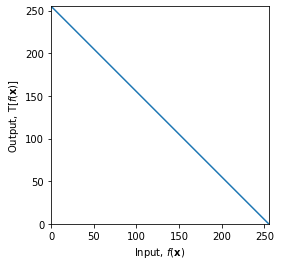

In [8]:
fig, ax = plt.subplots()
ax.plot(trfminv)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

Applying it to the image

In [9]:
image_transformed = cv.LUT(img_orig, trfminv)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Intensity Windowing

In this we are appling diferent tranformations to different pixel ranges

101
50
105
256


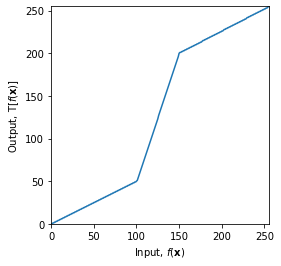

In [10]:
c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8') # creates an array of lenght 101 which has values from 0 to 50
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8') # creates an array of lenght 50 which has values from 51 to 199
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8') # # creates an array of lenght 105 which has values from 200 to 255
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8') # arranging the above arrays to get an array of lenght 256. So it creates the transformation array.
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
#plt.savefig('../../EN2550Lectures/en2550_lec02_point_operations_and_linear_filtering/figures/intensity_windowing.png')
plt.show()

In creating this type of graphs numpy.linspace comes in handy.

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]
Return evenly spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval (start, stop).

The endpoint of the interval can optionally be excluded.

Find more details in [here](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [11]:
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Histograms

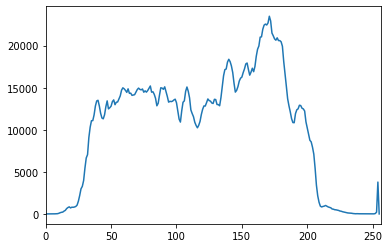

In [12]:
img = cv.imread('./images/naruto.jpg', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0,255 ])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

Most important part of the code is the cv.calcHist function.
It generates the histogram array of the image array.

hist	=	cv.calcHist(	images, channels, mask, histSize, ranges[, hist[, accumulate]]	)

## Parameters

images	    :Source arrays. They all should have the same depth, CV_8U, CV_16U or CV_32F , and the same size. Each of them can have                an arbitrary number of channels.

channels	:List of the dims channels used to compute the histogram. The first array channels are numerated from 0 to images[0]                   .channels()-1 , the second array channels are counted from images[0].channels() to images[0].channels() + images[1].                  channels()-1, and so on.

mask	    :Optional mask. If the matrix is not empty, it must be an 8-bit array of the same size as images[i] . The non-zero mask                elements mark the array elements counted in the histogram.

histSize	:Array of histogram sizes in each dimension.

ranges	    :Array of the dims arrays of the histogram bin boundaries in each dimension. When the histogram is uniform ( uniform                   =true), then for each dimension i it is enough to specify the lower (inclusive) boundary L0 of the 0-th histogram bin                 and the upper (exclusive) boundary UhistSize[i]−1 for the last histogram bin histSize[i]-1 . That is, in case of a                    uniform histogram each of ranges[i] is an array of 2 elements. When the histogram is not uniform ( uniform=false ), then              each of ranges[i] contains histSize[i]+1 elements: L0,U0=L1,U1=L2,...,UhistSize[i]−2=LhistSize[i]−1,UhistSize[i]−1 . The              array elements, that are not between L0 and UhistSize[i]−1 , are not counted in the histogram.

hist	    :Output histogram, which is a dense or sparse dims -dimensional array.

accumulate	:Accumulation flag. If it is set, the histogram is not cleared in the beginning when it is allocated. This feature                     enables you to compute a single histogram from several sets of arrays, or to update the histogram in time.


More details [here](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)

# Histogram of a color image

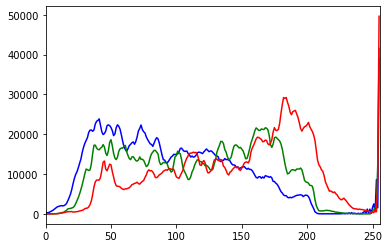

In [13]:
img = cv.imread('./images/naruto.jpg', cv.IMREAD_COLOR)     # reading the image to an array
color = ('b', 'g', 'r')                                     # creating an array with the color codes for plotting
for i, c in enumerate(color):                               # creating a loop to generate histograms for three channels of the color image.
    hist = cv.calcHist([img], [i], None, [256], [0,256])    # creating the histogram of the i th channel of the color image    
    plt.plot(hist, color = c)                               # plotting the histogram of the i th  image to a figure created by it's own
    plt.xlim([0,256])                                       # creating a limit to the x axis                                       
plt.show()                                                  # displaying the figure

# Histogram Equalization

Images with flat Histograms are vibrant. We use histogram equalization to convert images with swinging Histograms to an image with a flat histogram.

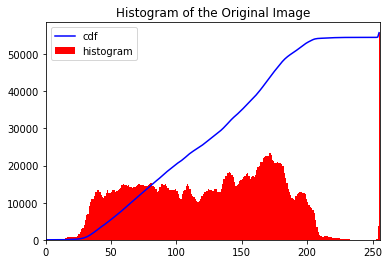

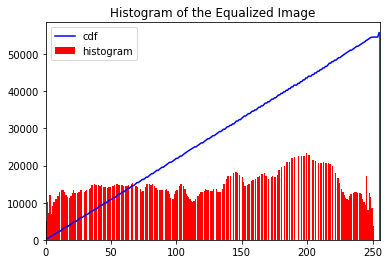

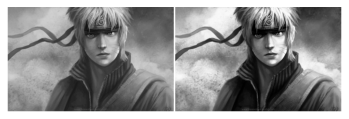

In [14]:
img = cv.imread('./images/naruto.jpg',cv.IMREAD_GRAYSCALE)

hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Original Image')
plt.show()


equ = cv.equalizeHist(img)

hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res, cmap='gray')

Let's analize the above code line by line.

After reading the image to an array, the histogram array is created using the numpy.histogram function.

You will get confused because in the above codes we used cv.calcHist function.

There is no diffference between thye two functions. Only advantage using the numpy version is the extra array output "bin" we get.

It is the same as the hist array. But bins will have 257 elements, because Numpy calculates bins as 0-0.99, 1-1.99, 2-2.99 etc. So final range would be 255-255.99. To represent that, they also add 256 at end of bins. But we don't need that 256. Upto 255 is sufficient.

You can find a comparison between two functions in [here](https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html)

However we can replace it with calcHist if we prefer it.

But there is a litlle difference in the parameters of the functions

Before looking it to further take a look at the code below.

In [15]:
lst=np.array([[34,56,34],[67,453,43]])
print(lst.ravel())

[ 34  56  34  67 453  43]


numpy.ravel() converts an numpy array into a flatterned array containing the same eliments of the input. 

Now you should have obsereved that input array to the np.histogram function is a flatterned array. 

The reason for that is np.histogram can only create histograms using 1D arrays contrasting from cv.calcHist which was able to generate histagrams from 2D arrays.

More details about np.histogram function in [here](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)

## numpy.cumsum

cumsum function returns an array with accumilated sums of the input array which has the same lenght as the input array.

Let's demonstrate this with a simple array.

In [16]:
lst=np.array([[34,56,34],[67,453,43]])
print(lst.cumsum())

[ 34  90 124 191 644 687]


As you can see, it flatterns the input array by it's own and creates the accumilated sum array.

To get the C.D.F of the histogram array we must devide the array by the sum of the histogram array. In otherwords maximum value of the hist.cumsum array

If you observe the code closly you can see that hist.cumsum()/max(hist.cumsum) is multiplyied by the maximum value of the histogram. This is done just for the purpose of displaying the c.d.f in the same graph with the histogram graph.

Otherwise c.d.f only have a range from 0 to 1 and we won't be able to see it comparing with the y axis values of the histogram.

After that it's just a matter of plotting the graphs. I don't want to make you bored by explaining them.

## cv.equalizeHist

this generates the equalized output array.